# **LEVEL 0 & 1**

In [1]:
!pip install idx2numpy
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
images_path = "images-idx3-ubyte"
labels_path = "labels-idx1-ubyte"

# Load images and labels
images = idx2numpy.convert_from_file(images_path)  # Shape: (70000, 28, 28)
labels = idx2numpy.convert_from_file(labels_path)  # Shape: (70000,)

# Print shapes to confirm
print("Images shape:", images.shape)  # Should be (70000, 28, 28)
print("Labels shape:", labels.shape)  # Should be (70000,)

Images shape: (60000, 28, 28)
Labels shape: (60000,)


In [3]:
unique_labels, counts = np.unique(labels, return_counts=True)

In [4]:
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

<ipython-input-5-716ea116ef9b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_labels, y=counts, palette="viridis")


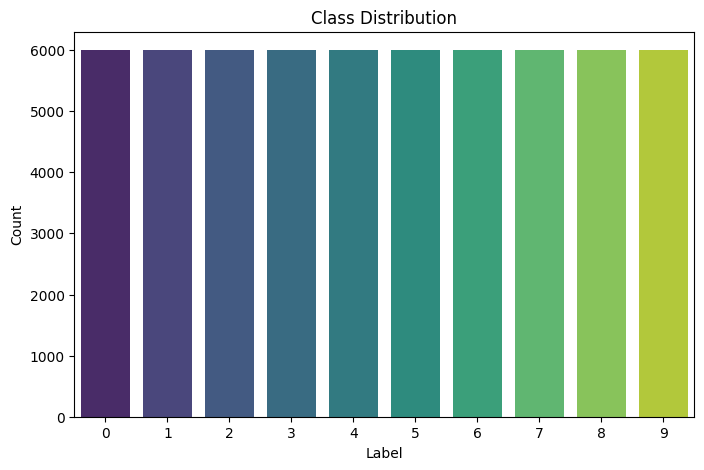

In [5]:
# Plot class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=unique_labels, y=counts, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [6]:
num_classes = len(unique_labels) #number of classes

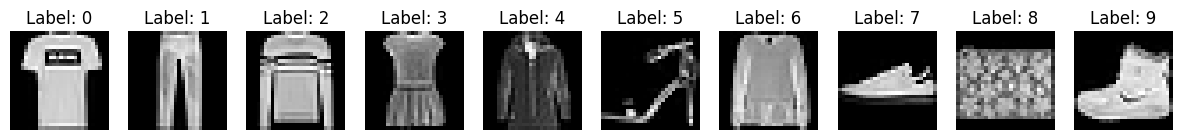

In [7]:
fig, axes = plt.subplots(1, num_classes, figsize=(15, 5)) #figure to display image

for i, label in enumerate(unique_labels):
    # Get the first image of each class
    sample_image = images[labels == label][0]

    # Display the image
    axes[i].imshow(sample_image, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.show()

In [8]:
# Check pixel statistics
print("Pixel Value Statistics:")
print("Min:", images.min(), "Max:", images.max())  # Expected: 0 to 255
print("Mean:", images.mean(), "Std Dev:", images.std())

Pixel Value Statistics:
Min: 0 Max: 255
Mean: 72.94035223214286 Std Dev: 90.02118235130519


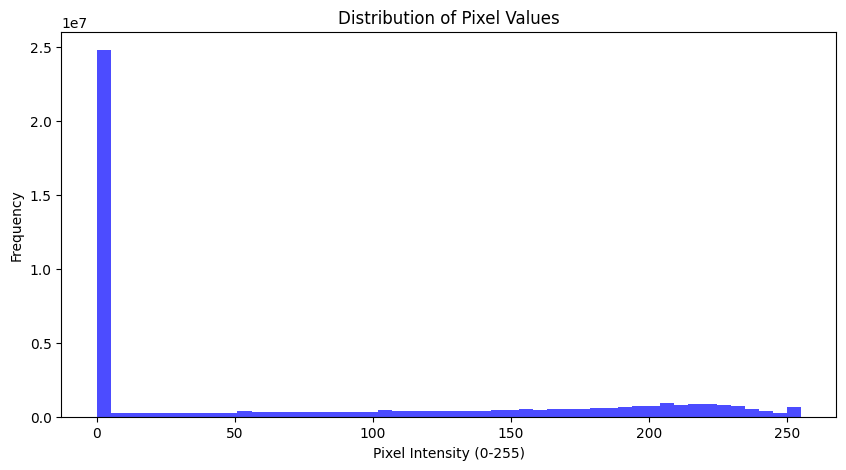

In [9]:
# Plot histogram of pixel values
plt.figure(figsize=(10, 5))
plt.hist(images.flatten(), bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Pixel Values")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.show()

# **LEVEL 2**

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
# Normalize pixel values (convert 0-255 to 0-1)
images_norm = images / 255.0  # Converting to range [0,1]

In [12]:
# Flatten each image from 28x28 to a 1D vector of 784 pixels
images_flat = images_norm.reshape(images.shape[0], -1)

In [13]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_flat, labels, test_size=0.3, random_state=42)

In [14]:
# Print shapes to confirm
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (42000, 784)
Test set shape: (18000, 784)


In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize model with high max_iter (to ensure convergence)
model = LogisticRegression()

In [16]:
# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# Evaluate model accuracy
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

In [18]:
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.8677
Test Accuracy: 0.8559
